In [92]:
# Classic imports
import random
import os

from data_processing import csv_data_processing
from pandas.plotting import scatter_matrix
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Parameters for algorithm
n_iter = 10             # iterations for algorithm to stop (additional stop variable)
k = 3                   # cluster number
standard = True         # standard scaling of data

In [93]:
# Data Processing with dedicated class (simple load with changing text/nonnumerical values to classes)
cdp = csv_data_processing()
database = cdp.process_data('clustering.csv')

In [94]:
nan_idx=[]
for iter, row in enumerate(database.values):
    for val in row:
        if pd.isnull(val) is True:
            nan_idx.append(iter)

database = database.drop(index=nan_idx, axis=1)

In [95]:
# Standard scaling of data
if standard is True:
    data=[]
    for column in database:
        col=[]
        for iter, item in enumerate(database[column]):
            col.append((item-np.mean(database[column]))/np.std(database[column]))
        data.append(col)

    database = pd.DataFrame(np.transpose(data), columns=database.columns)
    print(database)

      Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0   -1.720787 -0.507093 -0.815392   -1.540884  -0.587348      -0.316228   
1   -1.711715 -0.507093 -0.815392   -0.222572  -0.587348       3.162278   
2   -1.702642 -0.507093 -0.815392   -0.222572   1.702567      -0.316228   
3   -1.693570 -0.507093  1.226403   -0.222572  -0.587348      -0.316228   
4   -1.684498 -0.507093 -0.815392   -0.222572   1.702567      -0.316228   
..        ...       ...       ...         ...        ...            ...   
303  1.690330 -0.507093 -0.815392    2.414051  -0.587348      -0.316228   
304  1.699402 -0.507093 -0.815392   -0.222572  -0.587348      -0.316228   
305  1.708475  1.972027  1.226403   -0.222572  -0.587348      -0.316228   
306  1.717547 -0.507093 -0.815392    2.414051  -0.587348      -0.316228   
307  1.726619  1.972027  1.226403   -0.222572  -0.587348       3.162278   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.673893      

In [96]:
# This is a place for processing database (in this we work on three features)
database_drop = database.drop(columns='Loan_ID').astype(float)
database = database[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', "CoapplicantIncome", "Gender"]].copy()

# Deleting and storing the features names
if os.path.isdir(os.path.join(os.getcwd(), Path('exp_data'))) is False: os.mkdir('exp_data')

features = database.columns

# Saving them to txt and removing columns headers
with open('exp_data/features.txt', 'w') as f:
    for index, feats in enumerate(features): f.write(str(index) + ": " + str(feats) + "\n")

database = database.set_axis(list(range(0,len(features),1)), axis='columns')

print("Processed database:")
print(database)


Processed database:
            0         1         2         3         4
0    0.673893  0.796898  0.276189  0.091211 -0.507093
1   -0.410365 -1.316653  0.276189 -0.507947 -0.507093
2   -0.695985  0.524182  0.276189  0.428932 -0.507093
3    1.644452  1.240062  0.276189 -0.507947 -0.507093
4   -0.867220 -0.328056  0.276189  0.094389 -0.507093
..        ...       ...       ...       ...       ...
303  1.441025  0.796898  0.276189 -0.507947 -0.507093
304 -0.251459  0.115108  0.276189  0.266826 -0.507093
305 -0.478859 -1.146205  0.276189 -0.507947  1.972027
306  0.347177 -2.202981 -2.365620 -0.507947 -0.507093
307  0.673893  0.967346  0.276189 -0.507947  1.972027

[308 rows x 5 columns]


0: ApplicantIncome
1: LoanAmount
2: Loan_Amount_Term
3: CoapplicantIncome
4: Gender



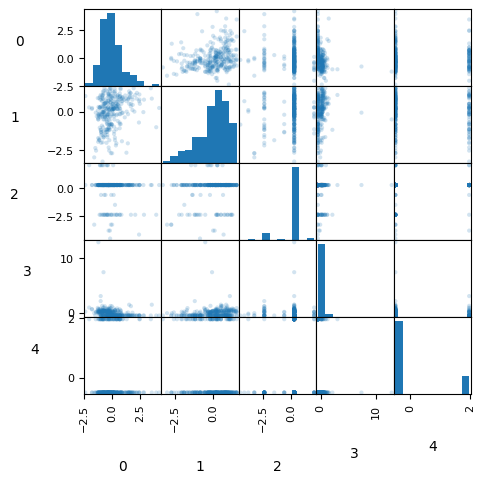

In [97]:
# Desciribing features with scatter matrix
with open('exp_data/features.txt', 'r') as f:
    print(f.read())

fig_scatter = scatter_matrix(database, alpha=0.2, figsize=(5,5), diagonal='hist')
for ax in fig_scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), labelpad=20)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right', labelpad=20)

In [98]:
# Picking random points for start of clustering
centroids = []
inertia_iter = []
for centers in range (0, k): centroids.append(database.loc[random.randint(0, database.shape[0])])

print(centroids)

[0   -1.085715
1    0.285555
2    0.276189
3    0.654213
4   -0.507093
Name: 154, dtype: float64, 0    1.678699
1    0.524182
2   -2.365620
3    1.213639
4   -0.507093
Name: 123, dtype: float64, 0    0.502659
1    0.183287
2    0.276189
3    0.465883
4   -0.507093
Name: 243, dtype: float64]


In [99]:
# Calculating distance from centroids
for iter in range(0, n_iter):
    distance = []
    for centers in centroids:
        sum = 0
        for idx, cordinate in enumerate(centers): sum += (database[idx] - cordinate)**2
        distance.append(np.sqrt(sum))

    distance = pd.DataFrame(np.transpose(distance))

    # Clustering data
    labels = []
    for row in distance.iloc:
        labels.append(row[row==np.min(row)].index.values[0])
        
    distance['labels'] = labels
    del(labels)

    clusters=[]
    for label in range(0, k):
        clusters.append(database[distance["labels"]==label])

    if database.shape[1] == 2:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot()

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], marker='o', alpha=0.5)


    if database.shape[1] == 3:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot(projection='3d')

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], centers[2], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], group[2], marker='o', alpha=0.5)

    centroids=[]
    for center in range(0, k): centroids.append(np.mean(database[distance['labels']==center], axis=0))

    inertia = 0
    for label in range(0, k):
        inertia += np.sum(distance[distance['labels']==label][label])
    inertia_iter.append(inertia)

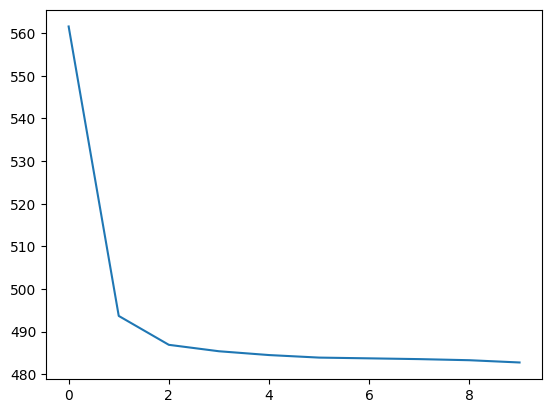

In [100]:
fig_inertia=plt.figure()
ax_inertia=fig_inertia.add_subplot()
ax_inertia.plot(inertia_iter)